# <center> Programa Educativo </center> 
## Exploratory Data Analysis (EDA)

No hay un procedimiento oficial de como aplicar un EDA a un dataset, pero la mayoría de los artículos publicados en internet hacen mencion a los siguientes pasos:
<br>
<li>1 Data Sourcing - Fuente de datos.</li>
<li>2 Exploración de datos básica.</li>
<li>3 Limpieza de datos.</li>
&emsp;&emsp;3.1 Valores faltantes o nulos.<br>
&emsp;&emsp;3.2 Valores duplicados.<br>
<li>4 Anális univariable.</li>
&emsp;&emsp;4.1 Outliers.
<li>5 Analysis bivariable.</li>
<li>6 Analisis multivariable.</li>
<br>
Por lo tanto, trataré de cubrir estos puntos en este ejercicio.

#### 1 Data Sourcing - Fuente de Datos

Usando postBuild hemos descargado el dataset necesario desde la url de Google Drive: <br>
https://docs.google.com/uc?export=download&id=1JmJ7b4XdwL4epv6iyONjkLOCjPTiUlXh


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('binder.csv')
data.sample()

,PROGRAMA_EDUCATIVO,DIVISION,NIVEL_EDUCATIVO,SEXO,EDAD,ESTADO_CIVIL,NUMERO_HIJOS,TRABAJA,SOSTEN_ECONOMICO,INTERNET,...,EXPERIENCIA_MODALIDAD,MODALIDAD_ESTUDIOS_BACHILLERATO,PROMEDIO_BACHILLERATO,HORAS_ESTUDIO_SEMANA,DISCAPACIDAD,PERIODO_ESCOLAR,ASIGNATURA,SEMESTRE,CALIFICACION,TIPO_CALIFICACIÓN
16961,Ing. en Energías Renovables,2,0,1,3,1,0,1,5,1,...,1,1,1,0,0,1,Ingeniería ambiental,3,2,1


#### 2 Exploración de datos básica.

La primera impresión que tengo de este dataset es que contiene registros de estudiantes de diferentes asignaturas en una universidad. El dataset nos provee de información que nos permite perfilar al estudiante y poder predecir sus calificaciones dependiendo de los valores en sus diferentes atributos (features), aún no esta claro el rango de valores, ni las variables que podemos utilizar para nuestro analisis.

En este paso estaremos obteniendo informacion basica del dataset, como lo es el tamaño, dimension y resumen del dataset. Para poder determinar la dimensión del dataset debemos de utilizar la funcion de <font color="Blue">shape</font> como se muestra a continuación.

In [3]:
data.shape

(44904, 23)

Esto nos indica que nuestro set de datos de estudiantes consiste en 44904 registros y 23 atributos.

Es necesario saber el tipo de datos con el que vamos a trabajar en cada columna, para obtener esta información debemos de ejecutar la siguiente función:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44904 entries, 0 to 44903
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PROGRAMA_EDUCATIVO               44904 non-null  object
 1   DIVISION                         44904 non-null  int64 
 2   NIVEL_EDUCATIVO                  44904 non-null  int64 
 3   SEXO                             44904 non-null  int64 
 4   EDAD                             44904 non-null  int64 
 5   ESTADO_CIVIL                     44904 non-null  int64 
 6   NUMERO_HIJOS                     44904 non-null  int64 
 7   TRABAJA                          44904 non-null  int64 
 8   SOSTEN_ECONOMICO                 44904 non-null  int64 
 9   INTERNET                         44904 non-null  int64 
 10  INTERNET_LUGAR                   44904 non-null  int64 
 11  EQUIPO_COMPUTO                   44904 non-null  int64 
 12  EQUIPO_COMPUTO_DESC             

#### 3 Limpieza de Datos

##### Valores Nulos o Faltantes

In [5]:
# Buscando valores nulos....

nulos = data.isnull().sum()
c = 0
for k in range(0,len(nulos.index)):
    if nulos[k] > 0:
        print(f'{nulos.index[k]} tiene valores nulos.')
        c += 1
if c == 0:
    print('No hay valores nulos.')

No hay valores nulos.


Afortunadamente tenemos un dataset bastante limpio, únicamente tenemos los atributos de [PROGRAMA_EDUCATIVO,ASIGNATURA] como variable de tipo objeto (texto), no contamos con valores nulos, por lo tanto; podemos continuar obteniendo más información sobre el dataset. 

El siguiente paso es ejecutar el método <font color="Blue">describe</font> el cual nos ayuda a identificar la distribucion de los atributos númericos 

In [6]:
data.describe()

,DIVISION,NIVEL_EDUCATIVO,SEXO,EDAD,ESTADO_CIVIL,NUMERO_HIJOS,TRABAJA,SOSTEN_ECONOMICO,INTERNET,INTERNET_LUGAR,...,EQUIPO_COMPUTO_DESC,EXPERIENCIA_MODALIDAD,MODALIDAD_ESTUDIOS_BACHILLERATO,PROMEDIO_BACHILLERATO,HORAS_ESTUDIO_SEMANA,DISCAPACIDAD,PERIODO_ESCOLAR,SEMESTRE,CALIFICACION,TIPO_CALIFICACIÓN
count,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,...,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000
mean,1.105180,0.031534,0.536144,1.258351,1.659295,0.201185,0.761603,4.584491,0.997706,0.260823,...,1.428536,0.355314,1.771357,1.639921,1.555296,0.022158,1.543448,2.236081,1.630657,0.986260
std,0.676307,0.174758,0.498697,0.915145,1.769710,0.482380,0.426108,0.772778,0.047839,0.857289,...,1.900415,0.478614,0.568406,0.783957,1.048144,0.147200,1.395470,1.342976,0.482632,0.116413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,1.000000,0.000000,...,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000
75%,2.000000,0.000000,1.000000,2.000000,4.000000,0.000000,1.000000,5.000000,1.000000,0.000000,...,4.000000,1.000000,2.000000,2.000000,2.000000,0.000000,3.000000,3.000000,2.000000,1.000000
max,2.000000,1.000000,1.000000,4.000000,5.000000,2.000000,1.000000,5.000000,1.000000,4.000000,...,5.000000,1.000000,3.000000,3.000000,6.000000,1.000000,4.000000,8.000000,2.000000,1.000000


Con el describe podemos obtener el conteo, el promedio, la desviación estandar, mínimo, máximo, el 25, 50 y 75 percentil del dataset. 
Desde mi punto de vista, varios atributos son de categoria, para poder tener una idea de en cuantas categorías se divide cada atributo, podemos ejecutar la siguiente instruccion:

In [7]:
data.nunique()

PROGRAMA_EDUCATIVO                  41
DIVISION                             3
NIVEL_EDUCATIVO                      2
SEXO                                 2
EDAD                                 5
ESTADO_CIVIL                         6
NUMERO_HIJOS                         3
TRABAJA                              2
SOSTEN_ECONOMICO                     6
INTERNET                             2
INTERNET_LUGAR                       5
EQUIPO_COMPUTO                       2
EQUIPO_COMPUTO_DESC                  6
EXPERIENCIA_MODALIDAD                2
MODALIDAD_ESTUDIOS_BACHILLERATO      4
PROMEDIO_BACHILLERATO                4
HORAS_ESTUDIO_SEMANA                 7
DISCAPACIDAD                         2
PERIODO_ESCOLAR                      5
ASIGNATURA                         570
SEMESTRE                             8
CALIFICACION                         2
TIPO_CALIFICACIÓN                    2
dtype: int64

##### Registros duplicados
Ya tenemos una idea de como estan distribuidos nuestros datos, el siguiente paso es eliminar los registros duplicados que tengamos. Para identificarlos, podemos ejecutar la siguiente instrucción:

In [8]:
dup = data.duplicated()
print(dup.sum())

730


Podemos observar que hay 730 registros duplicados, por lo tanto; podemos ejecutar las siguientes instrucciones para eliminar dichos registros.

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [10]:
data.shape

(44174, 23)

#### Analisis univariable.

##### Outliers

Hacemos uso de un <font color='Blue'> BoxPlot </font> para identificar los posibles Outliers de las variables que tengamos disponibles.

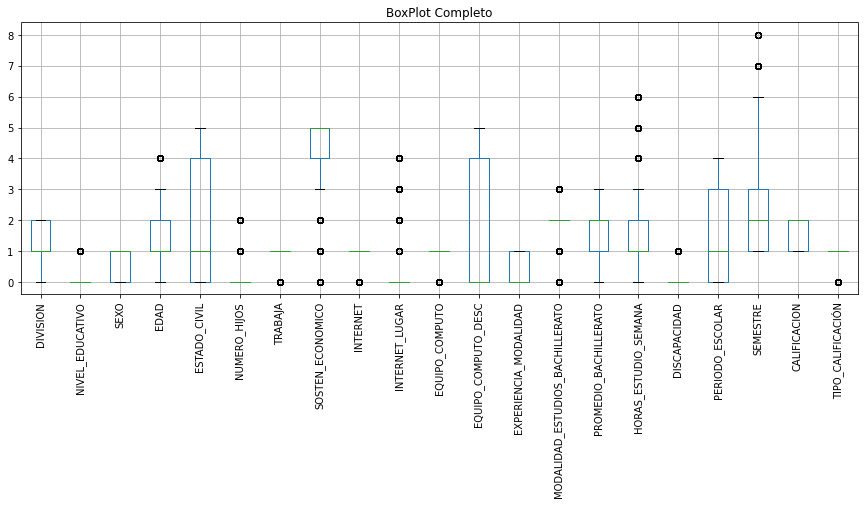

In [11]:
img = data.plot(kind='box', rot=90, title='BoxPlot Completo', figsize=(15,5), grid=True)

Como se puede observar en la gráfica anterior, tenemos un par de variables que cuentan con outliers ([EDAD,NUMERO_HIJOS,SOSTEN_ECONOMICO,HORAS_ESTUDIO_SEMANA,SEMESTREE]), también podemos observar que los atributos de cateorias han sido removidos de la lista, porque no pueden ser graficados.
Por lo tanto, vamos a crear una función que nos ayude a eliminar estos Outliers con la intención de tener un dataset mas sano y podamos obtener mejores predicciones.

In [12]:
def eliminaOutlier(attr):
    sorted(attr)
    Q1,Q3 = attr.quantile([0.25,0.75])
    IQR=Q3-Q1
    bajo = Q1 - (1.5 * IQR)
    alto = Q3 + (1.5 * IQR)
    return bajo, alto

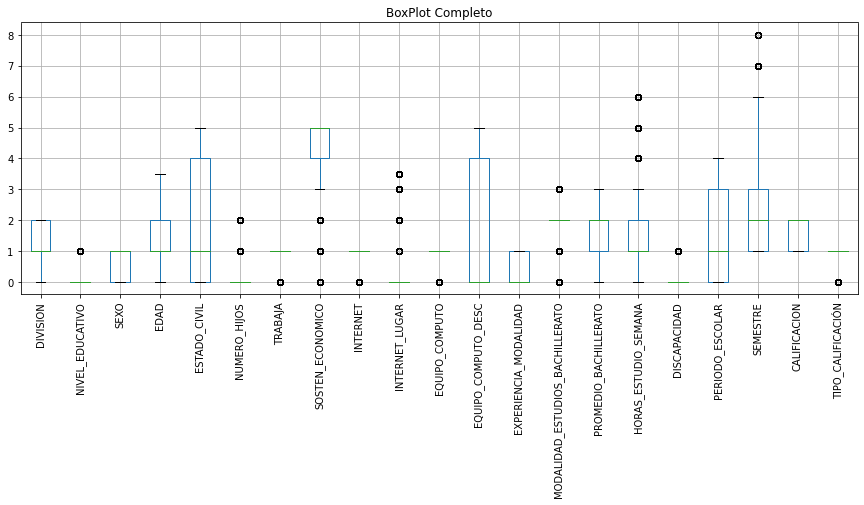

In [13]:
bajo, alto = eliminaOutlier(data['EDAD'])
data['EDAD'] = np.where(data['EDAD']>alto,alto,data['EDAD'])
data['EDAD'] = np.where(data['EDAD']<bajo,bajo,data['EDAD'])
data['EQUIPO_COMPUTO'] = np.where(data['EQUIPO_COMPUTO']>alto,alto,data['EQUIPO_COMPUTO'])
data['EQUIPO_COMPUTO'] = np.where(data['EQUIPO_COMPUTO']<bajo,bajo,data['EQUIPO_COMPUTO'])
data['INTERNET_LUGAR'] = np.where(data['INTERNET_LUGAR']>alto,alto,data['INTERNET_LUGAR'])
data['INTERNET_LUGAR'] = np.where(data['INTERNET_LUGAR']<bajo,bajo,data['INTERNET_LUGAR'])
img = data.plot(kind='box', rot=90, title='BoxPlot Completo', figsize=(15,5), grid=True)

Cuando tenemos multiples valores categoricos en nuestro dataset, resulta mejor poder visualizar los datos usando un plot de tipo pastel.

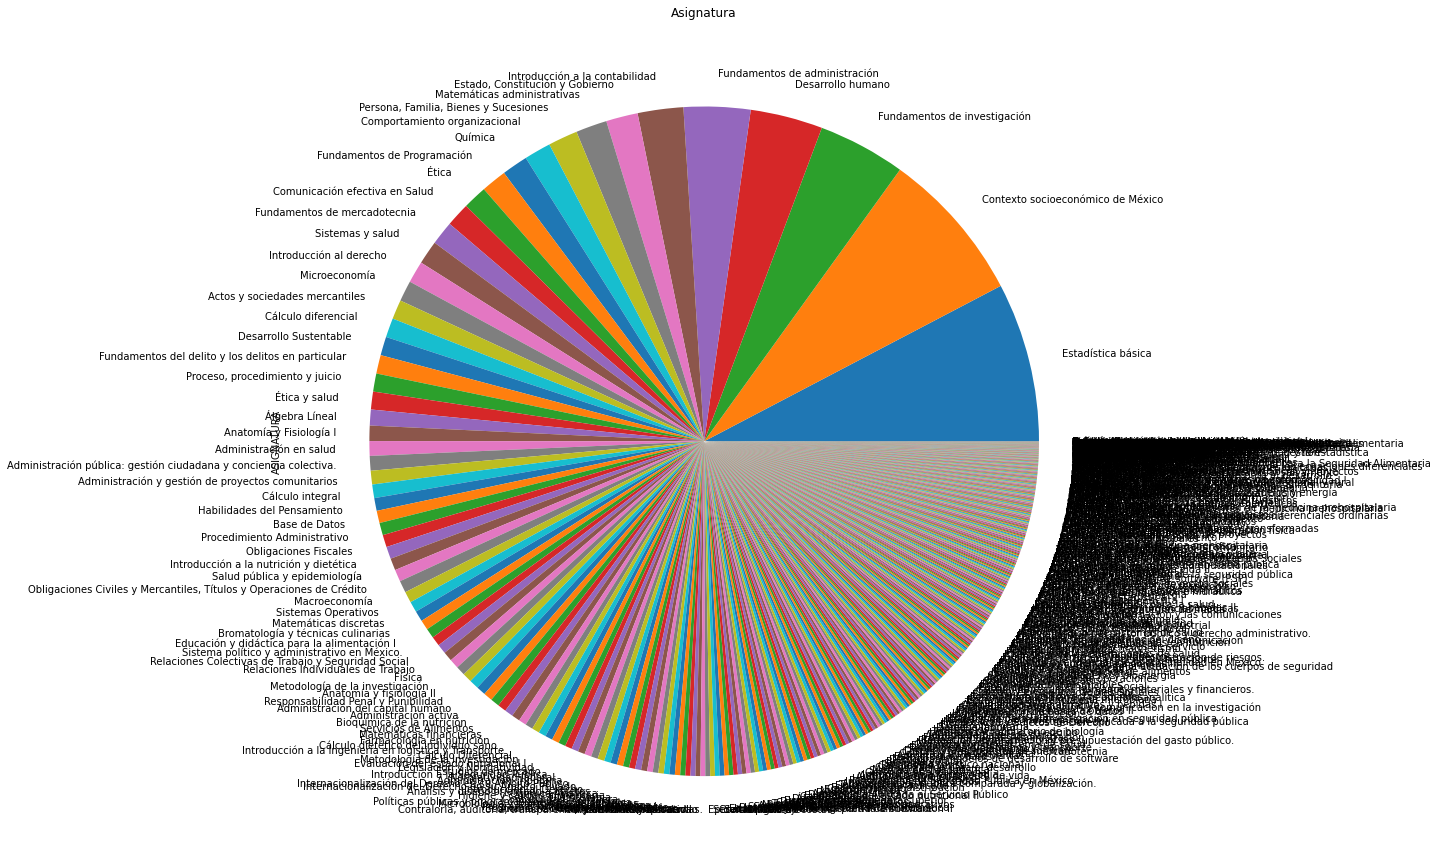

In [14]:
data.ASIGNATURA.value_counts(normalize=True).plot(kind="pie",figsize=(15,100), title="Asignatura")
plt.show()

En caso de que las diferentes categorias sean relativamente pequeñas, estas pueden ser visualizadas de la siguiente manera:

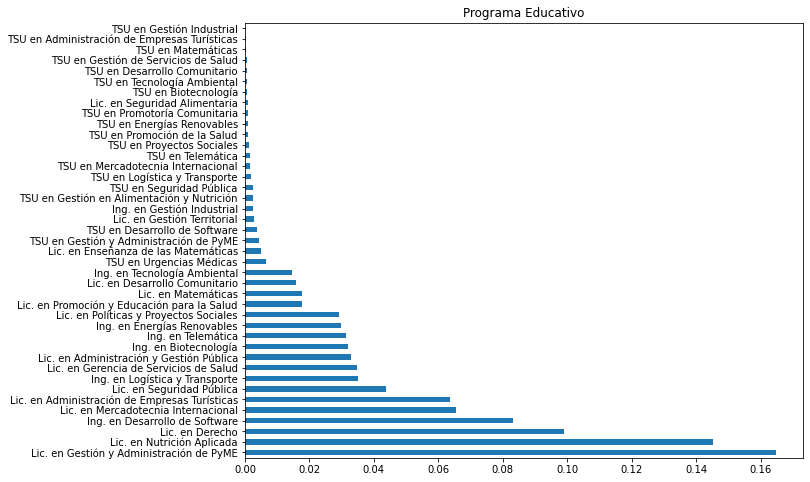

In [15]:
data.PROGRAMA_EDUCATIVO.value_counts(normalize=True).plot(kind="barh",figsize=(10,8), title="Programa Educativo")
plt.show()

#### Analisis Bivariable

Existen 3 tipos de analisos bivariable, los cuales se mencionan a continuación:

##### Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

##### Categorical vs. Numerical
1. Bar chart
2. Violin plot
3. Categorical box plot 
4.Swarm plot

##### Two Categorical Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

In [16]:
dataNum = data.loc[:, data.columns!='PROGRAMA_EDUCATIVO']
dataNum = dataNum.loc[:, dataNum.columns!='ASIGNATURA']
cols = dataNum.columns.to_list()

In [17]:
def getScatterPlot(atributo):
    figure, axis = plt.subplots(5,5, figsize=(20,10), constrained_layout = True)
    cont = 0
    try :
        for i in range(0,5):
            for j in range(0,5):
                if cols[cont] !=atributo:
                    axis[i,j].scatter(data[atributo],data[cols[cont]])
                    axis[i,j].set_title(f"{cols[cont]}")
                cont +=1
    except IndexError:
        print(atributo)
    return plt.show()

In [18]:
"""
for atributo in cols:
    getScatterPlot(atributo)
    
"""

'\nfor atributo in cols:\n    getScatterPlot(atributo)\n    \n'

#### Analisis Multivariable (Matriz de correlación)

Una matriz de correlaciones es un grafo tabular que representa las correlaciones entre pares de variables de los datos.
Cada fila y cada columna representa una variable, y el valor dentro de la casilla es el coeficiente de correlación entre las variables representadas por la fila y columna correspondientes.

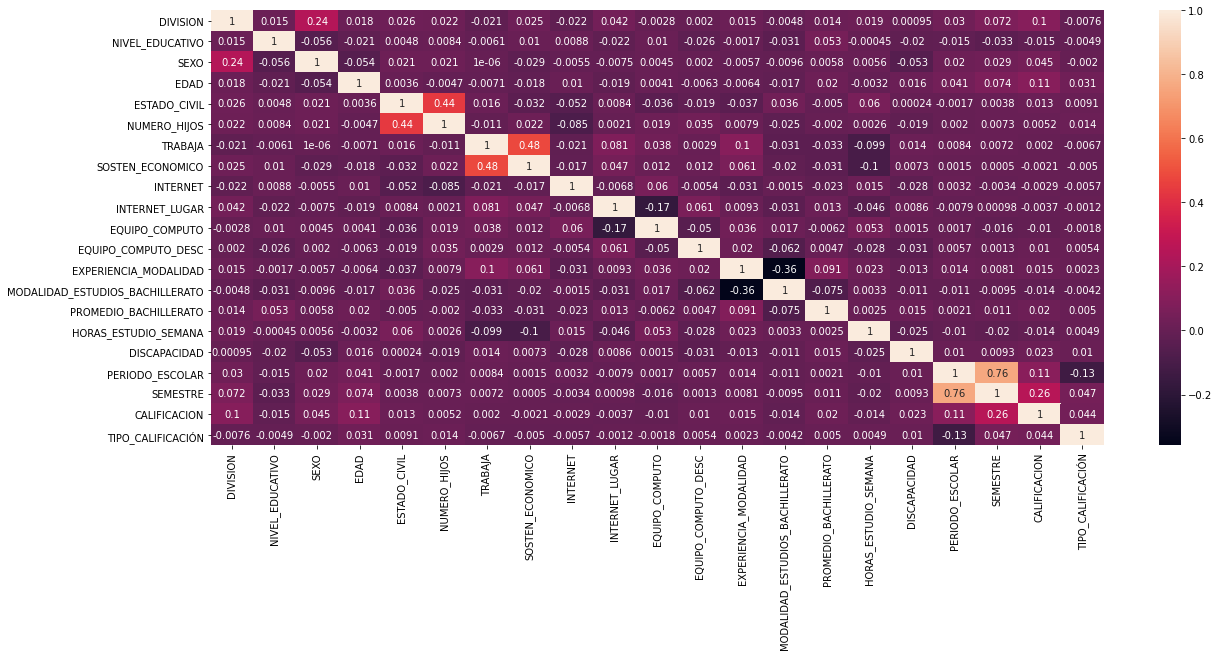

In [19]:
dataCorr = data.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(dataCorr, annot = True)
plt.show()

Una vez que creamos el scatterPlot para cada atributo comparado contra todos los atributos con la intención de indentificar variables que nos puedan ayudar para la creación de nuestro modelo, pero parece ser que debido a la naturaleza de los datos, el scatterPlot no nos proporciona mucha ayuda para identificar algun outlier de 2 variables.

Existe otro metodo <font color="Blue">Pair Plot</font>, el cual se denota a continuación:

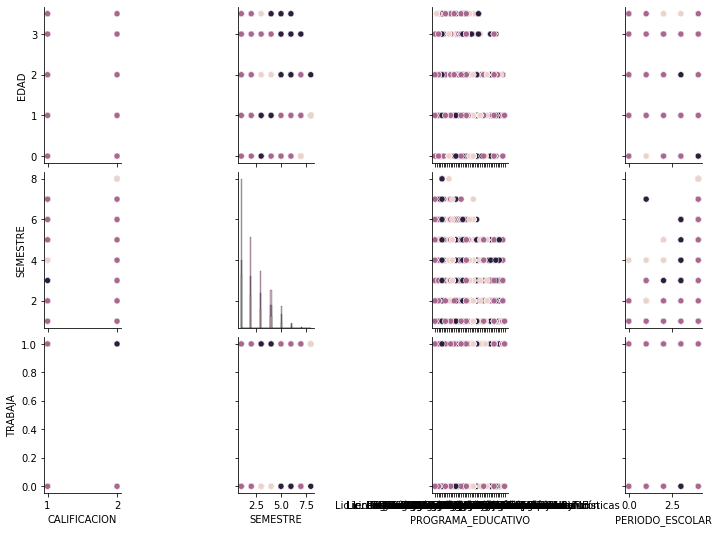

In [20]:
grafo = sns.pairplot(data, hue = "DIVISION", diag_kind = 'hist', kind = 'scatter', 
             x_vars=['CALIFICACION','SEMESTRE','PROGRAMA_EDUCATIVO','PERIODO_ESCOLAR'], 
             y_vars=['EDAD','SEMESTRE','TRABAJA'])
grafo._legend.remove()

## Aplicación de modelo de ML.

#### Selección de Variables

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz\bin'

Debido a que tenemos dos atributos ['TIPO_CALIFICACIÓN','CALIFICACION'] que pueden ser usados como nuestra etiqueta de resultado, es decir; tenemos un set de datos que puede ser captado por un lenguaje supervisado. Por lo tanto; debemos de escoger una de estas dos variables para hacerlo nuestro set de datos de "Target", al hacer un analisis de conteo en las variables, podemos observar que hay una gran diferencia entre el conteo de los registros para cada uno de sus diferentes estados; mientras que en la variable ['CALIFICACION'], se encuentran mejor distribuidos.

In [22]:
print("TIPO_CALIFICACION:\n",data.TIPO_CALIFICACIÓN.value_counts())
print("CALIFICACION:\n",data.CALIFICACION.value_counts())

TIPO_CALIFICACION:
 1    43563
0      611
Name: TIPO_CALIFICACIÓN, dtype: int64
CALIFICACION:
 2    27890
1    16284
Name: CALIFICACION, dtype: int64


Por lo tanto, procedemos a eliminar el atributo de TIPO_CALIFICACIÓN de nuestro set de datos.a:

In [23]:
data = data.loc[:, data.columns!='TIPO_CALIFICACIÓN']
res = data['CALIFICACION']

#### Arboles de decisión

Una vez que hemos seleccionado nuestra variable de etiqueta, o resultados, debemos de hacer modificaciones en el dataset para poder considerar el uso de las variables categoricas en nuestro algoritmo, por lo tanto; vamos a ejecutar el siguiente comando:

In [32]:
dataDT = pd.get_dummies(data,drop_first=True)
dataDT

,DIVISION,NIVEL_EDUCATIVO,SEXO,EDAD,ESTADO_CIVIL,NUMERO_HIJOS,TRABAJA,SOSTEN_ECONOMICO,INTERNET,INTERNET_LUGAR,...,ASIGNATURA_Álgebra lineal,ASIGNATURA_Álgebra lineal I,ASIGNATURA_Álgebra lineal II,ASIGNATURA_Ética,ASIGNATURA_Ética ambiental,ASIGNATURA_Ética y Desarrollo,ASIGNATURA_Ética y salud,ASIGNATURA_Ética y valores,"ASIGNATURA_Ética, ciudadanía y sustentabilidad","ASIGNATURA_Óptica, electricidad y magnetismo"
0,1,0,0,3.0,0,0,1,5,1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,3.0,0,0,1,5,1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,3.0,0,0,1,5,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,3.0,0,0,1,5,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3.0,0,0,1,5,1,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44899,1,0,1,1.0,0,0,0,4,1,0.0,...,0,0,0,0,0,0,0,0,0,0
44900,1,0,1,1.0,0,0,0,4,1,0.0,...,0,0,0,0,0,0,0,0,0,0
44901,1,0,0,1.0,0,0,1,5,1,0.0,...,0,0,0,0,0,0,0,0,0,0
44902,1,0,1,1.0,0,0,0,4,1,0.0,...,0,0,0,0,0,0,0,0,0,0


Ahora tenemos que separar nuestro set de datos en 4 partes, 
1. Set de Entrenamiento (Atributos y Resultado esperado).
2. Set de Pruebas (Atributos y Resultado esperado).

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataDT, res, stratify=res, random_state=42)

Esto con el propósito de tener una fuente de datos que pueda ser usada por una o más algoritmos y modelos de aprendizaje que nos permita comparar la eficiencia de los mismos. Por ahora empezaremos con <font colot='Red'>Arboles de Decisión</font> que nos permitan categorizar nuestros datos.

In [34]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)

In [35]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [36]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [40]:
export_graphviz(
    tree, out_file="tree.dot", class_names=["True", "False"],
    feature_names=list(dataDT.columns), impurity=False, filled=True)

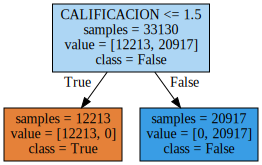

In [41]:
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### Regresión Linear

In [57]:
model = LinearRegression(fit_intercept=True)

In [56]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(33130,)
(11044,)
(33130, 629)
(11044, 629)


In [58]:
model.fit(X_train, y_train)

LinearRegression()

In [59]:
temp = model.predict(X_test)
temp = pd.Series(temp)
for i in range(0,len(temp)):
    temp[i] = int(round(temp[i]))
temp

0        2.0
1        1.0
2        1.0
3        2.0
4        2.0
        ... 
11039    2.0
11040    2.0
11041    2.0
11042    1.0
11043    1.0
Length: 11044, dtype: float64

In [65]:
y_test.astype(int)

7128     2
32434    1
36332    1
1962     2
13003    2
        ..
17180    2
16299    2
16694    2
41916    1
36556    1
Name: CALIFICACION, Length: 11044, dtype: int64

In [61]:
df = pd.DataFrame()
df['Prediccion'] = temp.values.astype(int)
df['Original'] = y_test.values
df['Diff'] = (df['Prediccion'] == df['Original'])
df

,Prediccion,Original,Diff
0,2,2,True
1,1,1,True
2,1,1,True
3,2,2,True
4,2,2,True
...,...,...,...
11039,2,2,True
11040,2,2,True
11041,2,2,True
11042,1,1,True


In [63]:
lin_mse= mse(df['Original'],df['Prediccion'],squared=False)
lin_mse

0.0

In [64]:
lin_mse= mse(df['Original'],df['Prediccion'],squared=True)
lin_mse

0.0